In [1]:
from keras.models import Sequential
import TP1_Code_teacher as gener
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, advanced_activations, Dropout, UpSampling2D, Reshape
from keras.optimizers import SGD , Adam
import numpy as np 

Using Theano backend.


In [2]:
from keras.utils import to_categorical , normalize

# 3. Simple classification

## A.Generate images

We first generate the dataset 

In [3]:
class_names=["rectangle","disk","triange"]

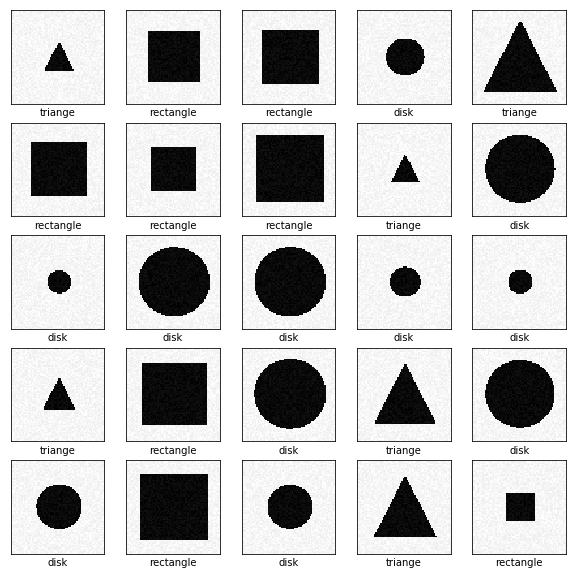

In [4]:
[x_train,y_train]=gener.generate_dataset_classification(300,20) 


#prompt a sample of data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(72,72), cmap='gray')
    plt.xlabel(class_names[int(y_train[i])])

## B. Building deep network

We transform data to categorical to traduce the shape into list of 3 elements 

In [5]:
y_train_2=to_categorical(y_train)
y_train_2[5]

array([1., 0., 0.], dtype=float32)

In [6]:
input_dime=x_train[0].shape
input_dime

(5184,)

### 1. Gradient descent optimizer

We build a 25 fully conected neurons network with a sgd optimizer. To get better results ,mean squared error was used instead of categorical crossentropy as the sgd seems to be more efficient on mean squared error 

In [7]:
model_sgd = Sequential ()
input_dime=x_train[0].shape
n_network=25
model_sgd.add(Dense(n_network,activation='relu',input_shape=input_dime))
model_sgd.add(Dense(3,activation='softmax'))
sgd = SGD(lr=0.01,decay=1e-6, momentum=0.9,nesterov=True)
model_sgd.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [8]:
model_sgd.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                129625    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78        
Total params: 129,703
Trainable params: 129,703
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_sgd.fit(x_train,y_train_2, epochs=20, batch_size=32, validation_split = 0.2)

Train on 240 samples, validate on 60 samples
Epoch 1/20
240/240 [==============================] - 0s 180us/step - loss: 0.2610 - acc: 0.4292 - val_loss: 0.2642 - val_acc: 0.3167
Epoch 2/20
240/240 [==============================] - 0s 146us/step - loss: 0.2073 - acc: 0.5333 - val_loss: 0.1636 - val_acc: 0.7167
Epoch 3/20
240/240 [==============================] - 0s 119us/step - loss: 0.1546 - acc: 0.6417 - val_loss: 0.1385 - val_acc: 0.7667
Epoch 4/20
240/240 [==============================] - 0s 116us/step - loss: 0.1308 - acc: 0.7292 - val_loss: 0.1141 - val_acc: 0.8000
Epoch 5/20
240/240 [==============================] - 0s 137us/step - loss: 0.1123 - acc: 0.8083 - val_loss: 0.1014 - val_acc: 0.8000
Epoch 6/20
240/240 [==============================] - 0s 141us/step - loss: 0.1026 - acc: 0.7750 - val_loss: 0.0869 - val_acc: 0.8833
Epoch 7/20
240/240 [==============================] - 0s 131us/step - loss: 0.0812 - acc: 0.8708 - val_loss: 0.0799 - val_acc: 0.9167
Epoch 8/20
240/24

we obtain a 92% accuracy on validation dataset which could be satisfying. 

#### Classification evaluation

We would like to asse the acuracy of the classification. So we generate a test dataset

In [10]:
X_test = gener.generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
predict=model_sgd.predict(X_test).tolist()
class_names[predict[0].index(max(predict[0]))]

'disk'

We visualize a random of 20 samples, if the prediction is wrong it is flaged in red

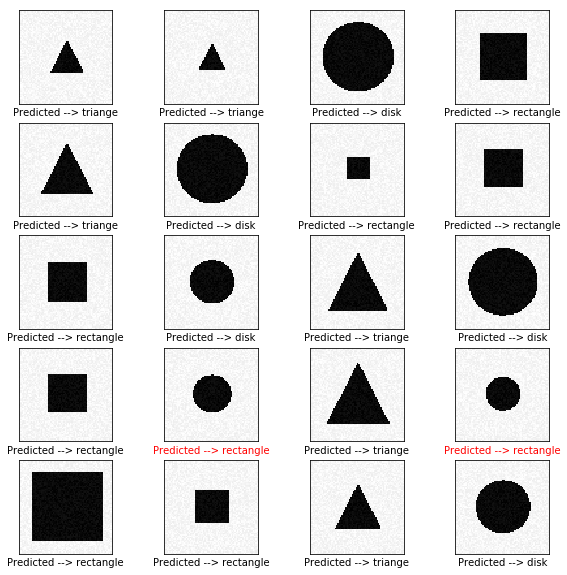

In [11]:
[x_test,y_test]=gener.generate_dataset_classification(20,20) 
y_predict=model_sgd.predict(x_test).tolist()
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(72,72), cmap='gray')
    if class_names[y_predict[i].index(max(y_predict[i]))]==class_names[int(y_test[i])]:
        plt.xlabel('Predicted --> '+ class_names[y_predict[i].index(max(y_predict[i]))])
    else :
        plt.xlabel('Predicted --> '+ class_names[y_predict[i].index(max(y_predict[i]))],color='r')

### 2. Adam optimizer

We move now on uzing the Adam optimizer 

In [12]:
model_adam = Sequential ()
input_dime=x_train[0].shape
model_adam.add(Dense(3,activation='softmax',input_shape=input_dime))
adm = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model_adam.compile(loss='categorical_crossentropy', optimizer=adm ,metrics=['accuracy'])

In [13]:
model_adam.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_adam.fit(x_train,y_train_2, epochs=20, batch_size=32, validation_split = 0.2)

Train on 240 samples, validate on 60 samples
Epoch 1/20
240/240 [==============================] - 0s 91us/step - loss: 2.4953 - acc: 0.3375 - val_loss: 1.9908 - val_acc: 0.4000
Epoch 2/20
240/240 [==============================] - 0s 110us/step - loss: 1.2544 - acc: 0.5667 - val_loss: 0.9094 - val_acc: 0.6833
Epoch 3/20
240/240 [==============================] - 0s 102us/step - loss: 0.7842 - acc: 0.7167 - val_loss: 0.7150 - val_acc: 0.5833
Epoch 4/20
240/240 [==============================] - 0s 86us/step - loss: 0.5659 - acc: 0.7958 - val_loss: 0.5048 - val_acc: 0.7667
Epoch 5/20
240/240 [==============================] - 0s 100us/step - loss: 0.4159 - acc: 0.8750 - val_loss: 0.3765 - val_acc: 0.8500
Epoch 6/20
240/240 [==============================] - 0s 108us/step - loss: 0.3357 - acc: 0.9167 - val_loss: 0.3163 - val_acc: 0.9167
Epoch 7/20
240/240 [==============================] - 0s 97us/step - loss: 0.2925 - acc: 0.9125 - val_loss: 0.3425 - val_acc: 0.8333
Epoch 8/20
240/240 [

The classification is much more efficient with the adam optimizer as we reach an accuracy of 98% on the validation dataset. Here is the same visualisation of a random sample of the prediction for a test set.

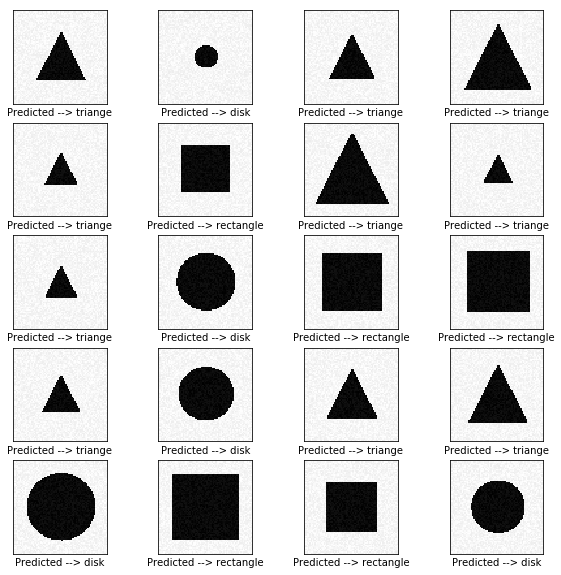

In [15]:
[x_test,y_test]=gener.generate_dataset_classification(20,20) 
y_predict=model_adam.predict(x_test).tolist()
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(72,72), cmap='gray')
    if class_names[y_predict[i].index(max(y_predict[i]))]==class_names[int(y_test[i])]:
        plt.xlabel('Predicted --> '+ class_names[y_predict[i].index(max(y_predict[i]))])
    else :
        plt.xlabel('Predicted --> '+ class_names[y_predict[i].index(max(y_predict[i]))],color='r')

# 4. Visualization of the Solution

In [16]:
weight_sgd=model_sgd.get_weights()
weight_adam=model_adam.get_weights()

In [17]:
len(weight_adam[0][0])

3

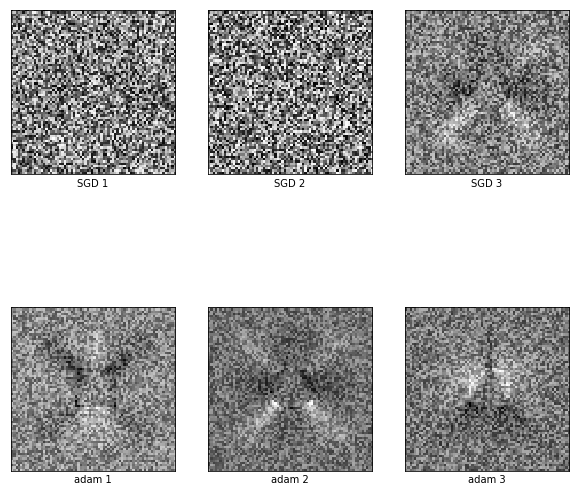

In [18]:
plt.figure(figsize=(10,10))

for k in range (6):
    plt.subplot(2,3,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if k < 3:
        plt.imshow(weight_sgd[0].transpose()[k].reshape(72,72), cmap='gray')
        plt.xlabel('SGD '+ str(k+1))
    else :
        plt.imshow(weight_adam[0].transpose()[k-3].reshape(72,72), cmap='gray')
        plt.xlabel('adam '+ str(k-2))

For the adam optimizer the shape could start to be recognized, which is not the case for SGD optimizer

# 5. A More Difficult Classification Problem

## A.Generate images

We generate here the dataset

In [19]:
[X_train, Y_train] = gener.generate_dataset_classification(800, 20, True)

In [20]:
Y_train.shape

(800,)

In [21]:
model_adam.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


Let visualize a sample of 25 figures 

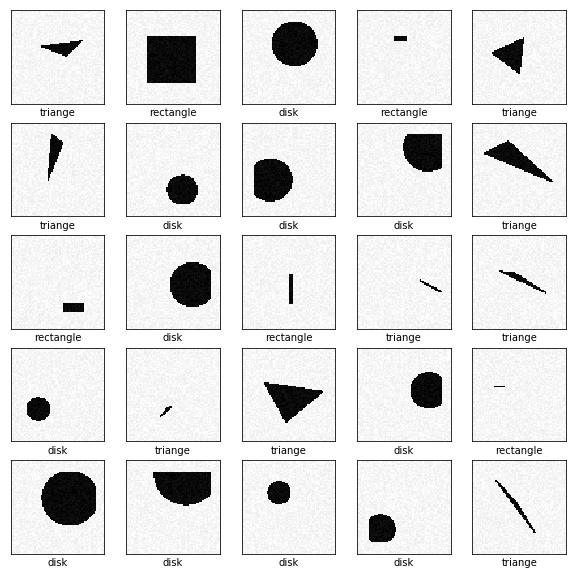

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(72,72), cmap='gray')
    plt.xlabel(class_names[int(Y_train[i])])

We transform here the label data to categorical to be able to use a softmax activation function on the last layer 

In [23]:
Y_train=to_categorical(Y_train)
Y_train.shape

(800, 3)

In [24]:
X_train=X_train.reshape(800,72,72,1)

In [25]:
X_train.shape

(800, 72, 72, 1)

## B. Build convolutional network 

we buid here a convulutional network with a fully connected network at the end. The summary is above

In [26]:
model_CNN = Sequential()
model_CNN.add(Conv2D(15, kernel_size=(5,5),activation='linear',input_shape=(72,72,1)))
model_CNN.add(Activation('relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Conv2D(30, kernel_size=(3,3),activation='linear',))
model_CNN.add(Activation('relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Flatten())
model_CNN.add(Dense(40,activation='relu'))
model_CNN.add(Dense(3,activation='softmax'))
adm = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model_CNN.compile(loss='categorical_crossentropy', optimizer=adm ,metrics=['accuracy'])

In [27]:
model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 15)        390       
_________________________________________________________________
activation_1 (Activation)    (None, 68, 68, 15)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 30)        4080      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 30)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7680)              0         
__________

In [28]:
model_CNN.fit(X_train,Y_train, epochs=15, batch_size=32, validation_split = 0.4)

Train on 480 samples, validate on 320 samples
Epoch 1/15
480/480 [==============================] - 2s 4ms/step - loss: 1.0359 - acc: 0.4771 - val_loss: 0.9580 - val_acc: 0.5531
Epoch 2/15
480/480 [==============================] - 3s 5ms/step - loss: 0.8017 - acc: 0.6604 - val_loss: 0.7830 - val_acc: 0.6562
Epoch 3/15
480/480 [==============================] - 2s 5ms/step - loss: 0.6138 - acc: 0.7438 - val_loss: 0.6915 - val_acc: 0.6937
Epoch 4/15
480/480 [==============================] - 3s 6ms/step - loss: 0.5225 - acc: 0.7896 - val_loss: 0.6303 - val_acc: 0.7312
Epoch 5/15
480/480 [==============================] - 2s 5ms/step - loss: 0.4557 - acc: 0.8313 - val_loss: 0.6053 - val_acc: 0.7438
Epoch 6/15
480/480 [==============================] - 2s 5ms/step - loss: 0.4010 - acc: 0.8500 - val_loss: 0.5654 - val_acc: 0.7969
Epoch 7/15
480/480 [==============================] - 2s 5ms/step - loss: 0.3773 - acc: 0.8646 - val_loss: 0.5637 - val_acc: 0.7719
Epoch 8/15
480/480 [==========

## B. Test the convolutional network 

We generate here a dataset to test our classification 

In [30]:
[X_test, Y_test] = gener.generate_dataset_classification(300, 20, True)
X_test_r=X_test.reshape(300,72,72,1)
Y_test_r = to_categorical(Y_test)

In [31]:
model_CNN.evaluate(X_test_r, Y_test_r)

300/300 [==============================] - 0s 1ms/step


[0.6289571340878805, 0.8166666666666667]

We obtain an accuracy on the test dataset of 82 % which could be satisfying. Above a visualization of the prediction for a sample of the test dataset, if the result is wrong, it is flagged in red 

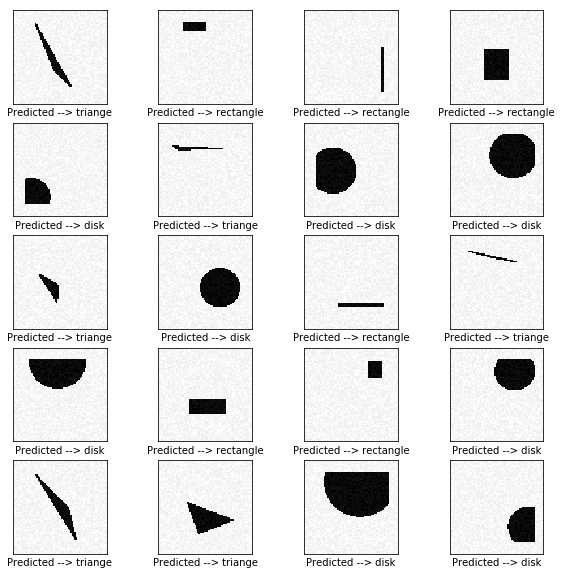

In [32]:
y_predict=model_CNN.predict(X_test_r).tolist()
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(72,72), cmap='gray')
    if class_names[y_predict[i].index(max(y_predict[i]))]==class_names[int(Y_test[i])]:
        plt.xlabel('Predicted --> '+ class_names[y_predict[i].index(max(y_predict[i]))])
    else :
        plt.xlabel('Predicted --> '+ class_names[y_predict[i].index(max(y_predict[i]))],color='r')

# 6. A Regression Problem

## Generate the data

We generate here the dataset

In [33]:
[X_train, Y_train] = gener.generate_dataset_regression(1200, 20)

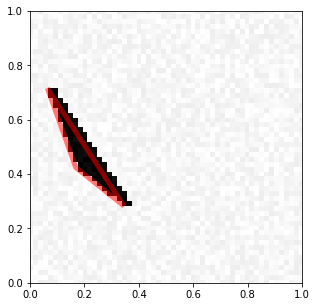

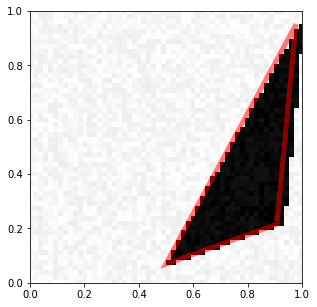

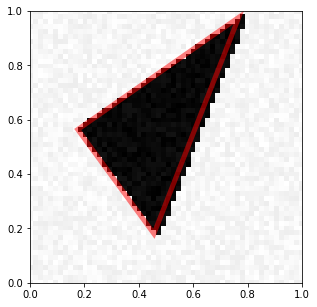

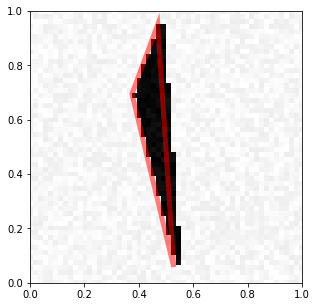

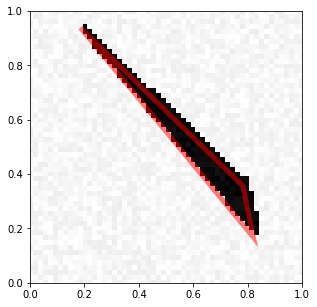

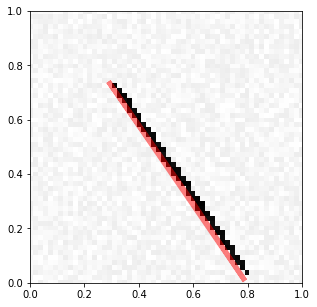

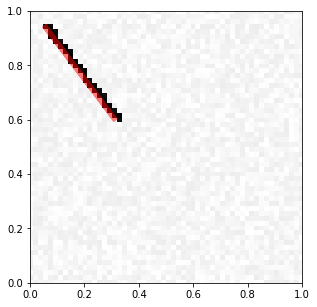

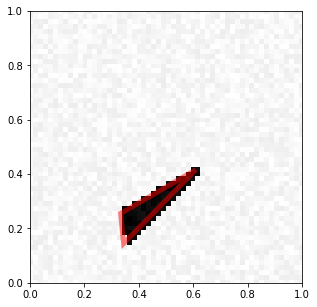

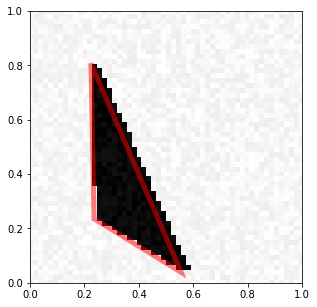

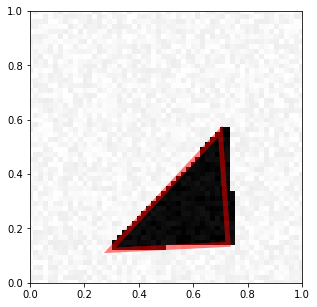

In [34]:
for k in range (10):
    gener.visualize_prediction(X_train[k], Y_train[k])


In [35]:
Y_train[0]

array([0.34587594, 0.28245237, 0.06392697, 0.71583396, 0.16800077,
       0.42444017])

In [36]:
X_train.shape

(1200, 5184)

## Process the data 

To be able to always train the same node on the same angle of the figure (for example, the first node train to estimate the highest angle on the figure) we sort Y (the classifier).  

In [37]:
def resort_y (Y):
    final_y=[]
    for k in range(len (Y)):
        y_ini=Y[k].tolist()
        y_to_sort=[y_ini[l] for l in [1,3,5]]
        y_sorted= sorted(y_to_sort)
        final_list=[]
        for j in range(len (y_sorted)):
            index_v=y_ini.index(y_sorted[j])
            final_list.append(y_ini[index_v-1])
            final_list.append(y_ini[index_v])
        final_y.append(final_list)
    return np.asarray(final_y)


In [38]:
Y_train_soreted=resort_y(Y_train)

In [39]:
X_train_r=X_train.reshape(1200,72,72,1)

## Build the network

We buid here a convulutional network with a fully connected network at the end. The summary is above

In [40]:
model_CNN_2 = Sequential()
model_CNN_2.add(Conv2D(32, kernel_size=(3,3),activation='linear',input_shape=(72,72,1)))
#model_CNN_2.add(Activation('relu'))
model_CNN_2.add(advanced_activations.LeakyReLU(alpha=0.1))
model_CNN_2.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_2.add(Conv2D(64, kernel_size=(3,3),activation='linear',))
#model_CNN_2.add(Activation('relu'))
model_CNN_2.add(advanced_activations.LeakyReLU(alpha=0.1))
model_CNN_2.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_2.add(Conv2D(120, kernel_size=(3,3),activation='linear',))
#model_CNN_2.add(Activation('relu'))
model_CNN_2.add(advanced_activations.LeakyReLU(alpha=0.1))
model_CNN_2.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN_2.add(Flatten())
model_CNN_2.add(Dense(70,activation='relu'))
model_CNN_2.add(Dropout(rate=0.35))
model_CNN_2.add(Dense(40,activation='linear'))
model_CNN_2.add(Dense(6,activation='tanh'))
adm = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model_CNN_2.compile(loss='mean_squared_error', optimizer=adm ,metrics=['accuracy'])

In [41]:
model_CNN_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 70, 70, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 70, 70, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 33, 33, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 120)       69240     
__________

In [42]:
model_CNN_2.fit(X_train_r,Y_train_soreted, epochs=30, batch_size=20, validation_split = 0.4)

Train on 720 samples, validate on 480 samples
Epoch 1/30
720/720 [==============================] - 10s 13ms/step - loss: 0.0865 - acc: 0.3889 - val_loss: 0.0459 - val_acc: 0.5042
Epoch 2/30
720/720 [==============================] - 10s 14ms/step - loss: 0.0482 - acc: 0.5278 - val_loss: 0.0326 - val_acc: 0.5479
Epoch 3/30
720/720 [==============================] - 11s 15ms/step - loss: 0.0397 - acc: 0.5806 - val_loss: 0.0290 - val_acc: 0.5708
Epoch 4/30
720/720 [==============================] - 10s 14ms/step - loss: 0.0342 - acc: 0.6375 - val_loss: 0.0253 - val_acc: 0.6396
Epoch 5/30
720/720 [==============================] - 12s 16ms/step - loss: 0.0318 - acc: 0.6306 - val_loss: 0.0233 - val_acc: 0.6896
Epoch 6/30
720/720 [==============================] - 11s 15ms/step - loss: 0.0283 - acc: 0.6653 - val_loss: 0.0207 - val_acc: 0.6667
Epoch 7/30
720/720 [==============================] - 10s 14ms/step - loss: 0.0250 - acc: 0.6639 - val_loss: 0.0176 - val_acc: 0.7187
Epoch 8/30
720/7

## Test the classification

We generate here a test set and visualize the prediction for a 30 figures sample

In [43]:
[X_test, Y_test] = gener.generate_test_set_regression()

In [44]:
X_test_r=X_test.reshape(300,72,72,1)
Y_predict=model_CNN_2.predict(X_test_r)

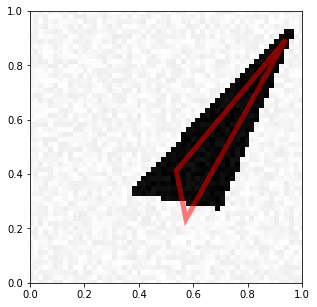

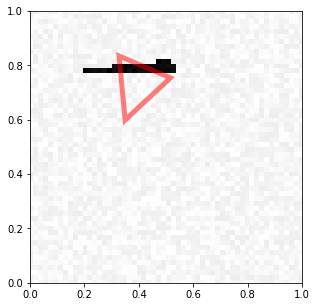

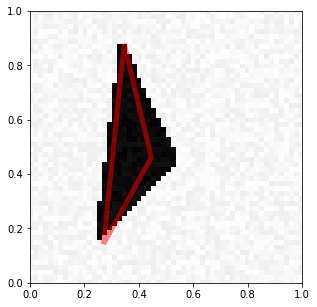

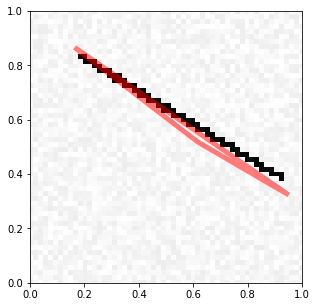

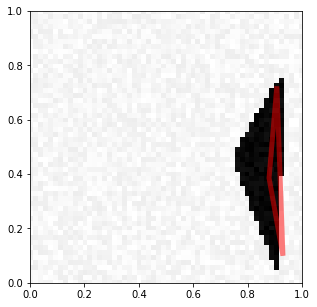

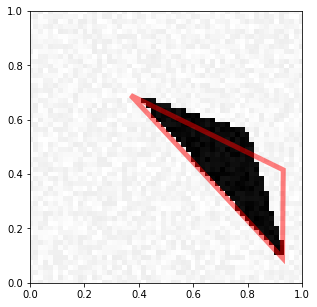

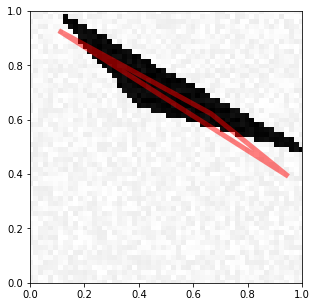

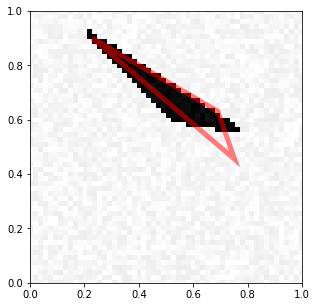

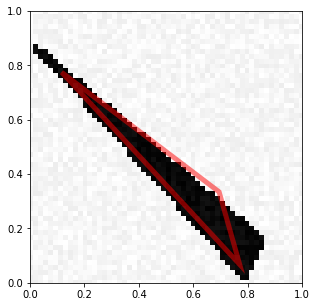

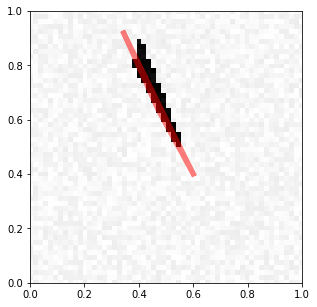

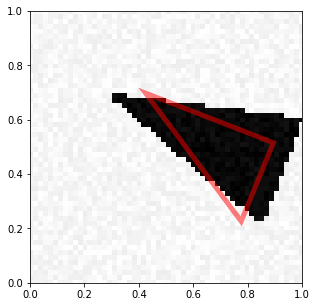

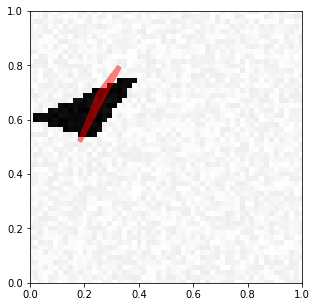

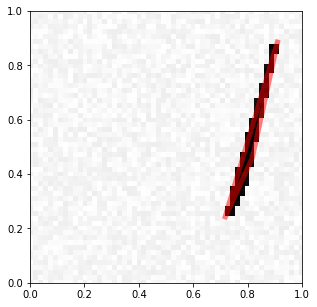

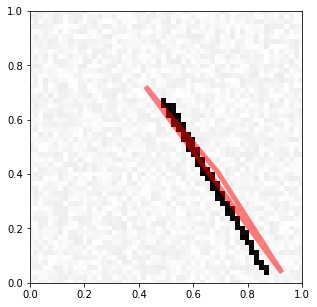

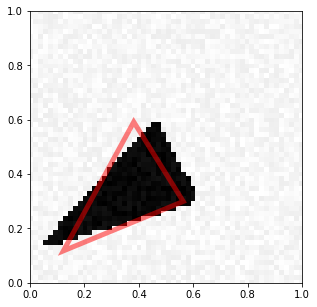

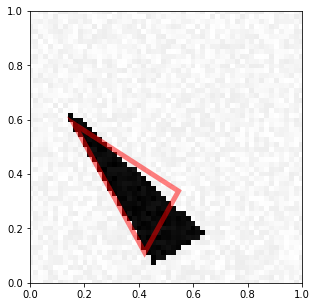

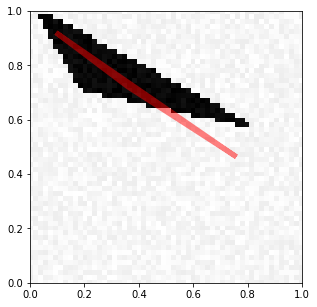

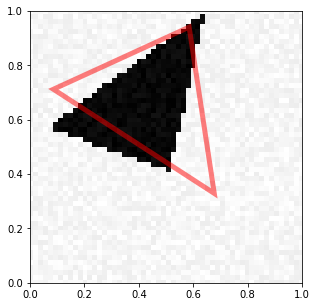

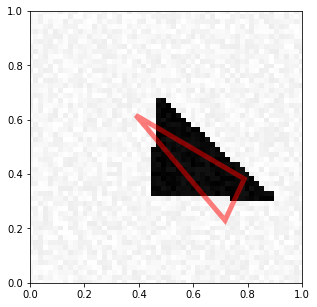

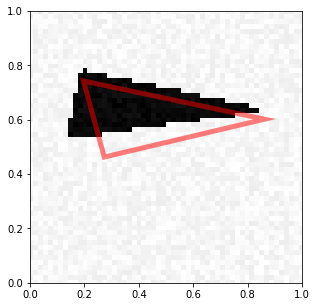

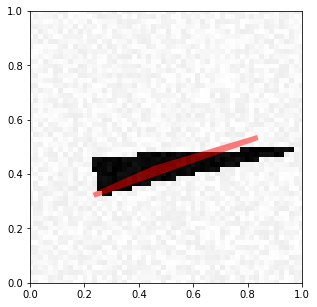

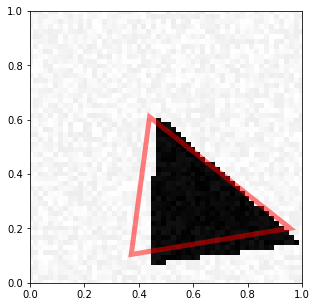

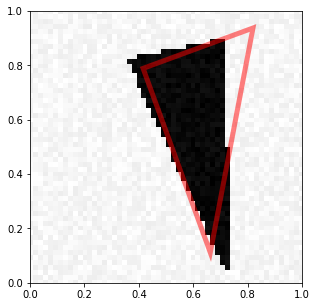

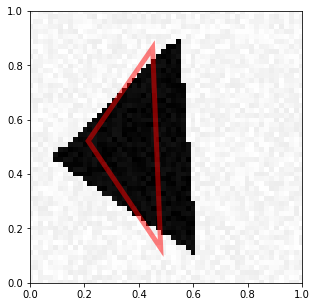

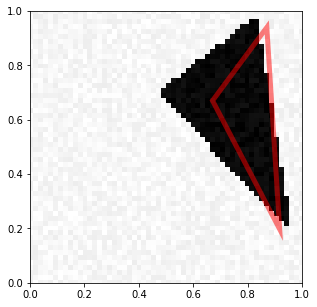

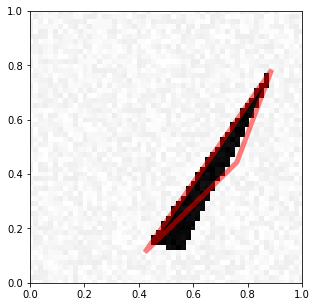

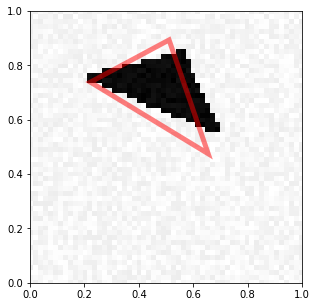

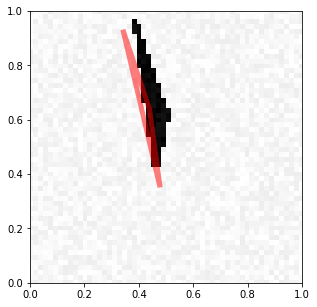

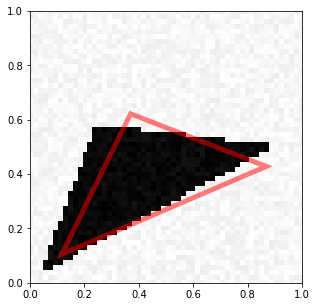

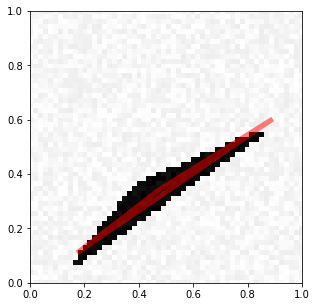

In [45]:
for k in range (30) : 
    gener.visualize_prediction(X_test[k], Y_predict[k])

# 7. Image Denoising

## Generate Dataset

In [46]:
[X_train, Y_train] = gener.generate_dataset_classification_bi(800)

In [47]:
X_train_r=X_train.reshape(800,72,72,1)
Y_train_r=Y_train.reshape(800,72,72,1)

In [48]:
Y_train_r.shape

(800, 72, 72, 1)

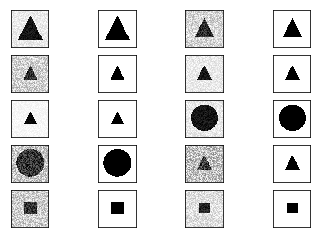

In [49]:
for i in range(10):
    plt.subplot(5,4,2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(72,72), cmap='gray')
    plt.subplot(5,4,2*(i+1))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Y_train[i].reshape(72,72), cmap='gray')

## Build the network

We implement a hourglass network, the summary is above :

In [50]:
model_CNN_noise = Sequential()
model_CNN_noise.add(Conv2D(32, kernel_size=(3,3),activation='linear',input_shape=(72,72,1), padding='same'))
model_CNN_noise.add(advanced_activations.LeakyReLU(alpha=0.1))
print(model_CNN_noise.output_shape)

model_CNN_noise.add(MaxPooling2D(pool_size=(2, 2)))
print(model_CNN_noise.output_shape)

model_CNN_noise.add(Conv2D(64, kernel_size=(3,3),activation='linear', padding='same'))
model_CNN_noise.add(advanced_activations.LeakyReLU(alpha=0.1))
print(model_CNN_noise.output_shape)

model_CNN_noise.add(MaxPooling2D(pool_size=(2, 2)))
print(model_CNN_noise.output_shape)

model_CNN_noise.add(Conv2D(32, kernel_size=(3,3),activation='linear', padding='same'))
model_CNN_noise.add(advanced_activations.LeakyReLU(alpha=0.1))
print(model_CNN_noise.output_shape)

model_CNN_noise.add(UpSampling2D(size=(2, 2)))
print(model_CNN_noise.output_shape)

model_CNN_noise.add(Conv2D(32, kernel_size=(3,3),activation='linear', padding='same'))
model_CNN_noise.add(UpSampling2D(size=(2, 2)))
model_CNN_noise.add(advanced_activations.LeakyReLU(alpha=0.1))
print(model_CNN_noise.output_shape)

model_CNN_noise.add(Conv2D(1, kernel_size=(3,3),activation='sigmoid', padding='same'))

adm = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model_CNN_noise.compile(loss='mean_squared_error', optimizer=adm ,metrics=['accuracy'])

(None, 72, 72, 32)
(None, 36, 36, 32)
(None, 36, 36, 64)
(None, 18, 18, 64)
(None, 18, 18, 32)
(None, 36, 36, 32)
(None, 72, 72, 32)


In [51]:
model_CNN_noise.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 72, 72, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 36, 36, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 32)        18464     
__________

In [52]:
model_CNN_noise.fit(X_train_r,Y_train_r, epochs=30, batch_size=20, validation_split = 0.4)

Train on 480 samples, validate on 320 samples
Epoch 1/30
480/480 [==============================] - 17s 35ms/step - loss: 0.1527 - acc: 0.7872 - val_loss: 0.1103 - val_acc: 0.8091
Epoch 2/30
480/480 [==============================] - 17s 35ms/step - loss: 0.0290 - acc: 0.9693 - val_loss: 0.0061 - val_acc: 0.9923
Epoch 3/30
480/480 [==============================] - 17s 36ms/step - loss: 0.0057 - acc: 0.9926 - val_loss: 0.0050 - val_acc: 0.9936
Epoch 4/30
480/480 [==============================] - 18s 38ms/step - loss: 0.0059 - acc: 0.9921 - val_loss: 0.0048 - val_acc: 0.9941
Epoch 5/30
480/480 [==============================] - 21s 43ms/step - loss: 0.0048 - acc: 0.9939 - val_loss: 0.0052 - val_acc: 0.9933
Epoch 6/30
480/480 [==============================] - 18s 36ms/step - loss: 0.0046 - acc: 0.9940 - val_loss: 0.0041 - val_acc: 0.9949
Epoch 7/30
480/480 [==============================] - 18s 37ms/step - loss: 0.0041 - acc: 0.9950 - val_loss: 0.0038 - val_acc: 0.9955
Epoch 8/30
480/4

## Test the network

We generate here a test dataset

In [53]:
[X_test, Y_test]=gener.generate_dataset_classification_bi(200)
X_test_r=X_test.reshape(200,72,72,1)

In [54]:
Y_predict=model_CNN_noise.predict(X_test_r)

In [55]:
Y_predict.shape

(200, 72, 72, 1)

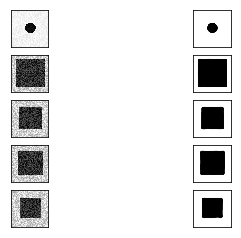

In [56]:
for i in range(5):
    plt.subplot(5,2,2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    figsize=(5, 5)
    plt.imshow(X_test[i].reshape(72,72), cmap='gray')
    plt.subplot(5,2,2*(i+1))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Y_predict[i].reshape(72,72), cmap='gray')

The results are satisfying, let zoom on one of them :

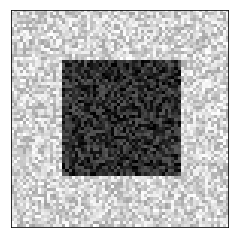

In [57]:
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_test[4].reshape(72,72), cmap='gray')

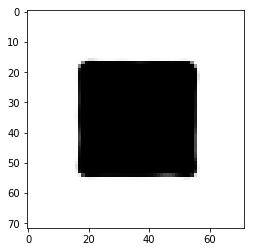

In [58]:
plt.imshow(Y_predict[4].reshape(72,72), cmap='gray')